In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#R&D Spend -- Research and devolop spend in the past few years
#Administration -- spend on administration in the past few years
#Marketing Spend -- spend on Marketing in the past few years
#State -- states from which data is collected
#Profit -- profit of each state in the past few years

In [2]:
df=pd.read_csv(r'C:/Users/admin/OneDrive/Desktop/50_Startups.csv')
df1=df.rename({'R&D Spend':'RnD','Administration':'Admin','Marketing Spend':'Mrkt'},axis=1)
df1.head()

,RnD,Admin,Mrkt,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
df.duplicated().any()

False

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Treating outliers

<Axes: >

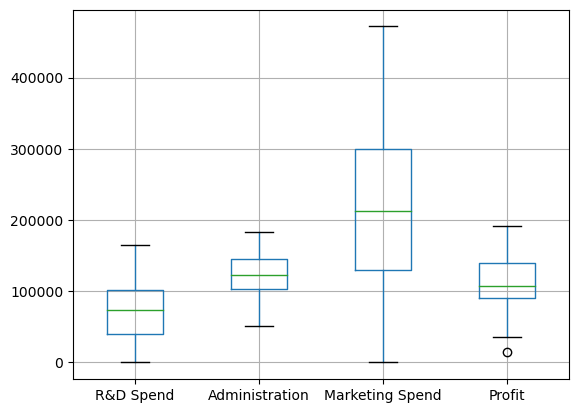

In [10]:
df.boxplot()

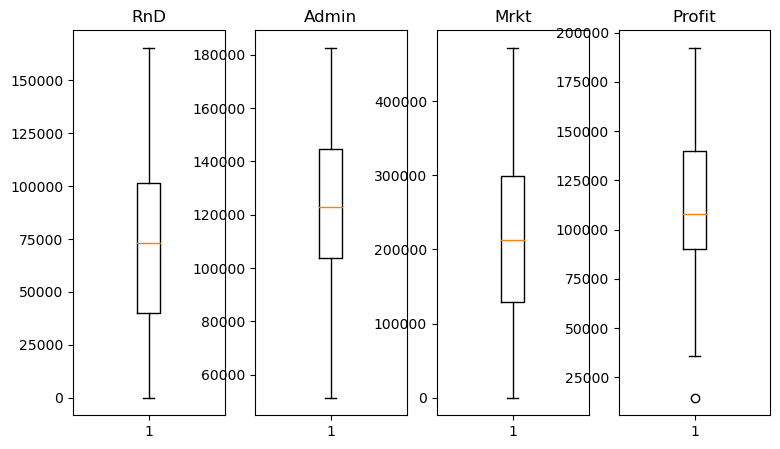

In [12]:
plt.figure(figsize=(9,5))
plt.subplot(141)
plt.boxplot(df1.RnD)
plt.title('RnD')
plt.subplot(142)
plt.boxplot(df1.Admin)
plt.title('Admin')
plt.subplot(143)
plt.boxplot(df1.Mrkt)
plt.title('Mrkt')
plt.subplot(144)
plt.boxplot(df1.Profit)
plt.title('Profit')
plt.show()

In [15]:
Q1 = df1.Profit.quantile(0.25)
Q3= df1.Profit.quantile(0.75)
IQR=Q3-Q1
Lower_bound=Q1-(1.5*IQR)
Upper_bound=Q3+(1.5*IQR)
print('First quantile=',Q1,'\n','Second quantile=',Q3,'\n','Inter Quantile range=',IQR,'\n','Lower Whisker=',Lower_bound,'\n','Upper whisker=',Upper_bound)

First quantile= 90138.9025 
 Second quantile= 139765.97749999998 
 Inter Quantile range= 49627.07499999998 
 Lower Whisker= 15698.290000000023 
 Upper whisker= 214206.58999999997


In [20]:
Outlier=df1.Profit[(df1.Profit<Lower_bound)|(df1.Profit>Upper_bound)]
print('Outlier in Profit:',Outlier)

Outlier in Profit: 49    14681.4
Name: Profit, dtype: float64


<Axes: >

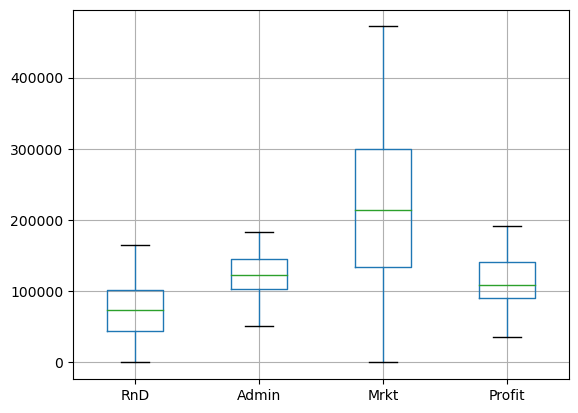

In [22]:
df2=df1[(df1.Profit>Lower_bound)&(df1.Profit<Upper_bound)]
df2.boxplot()

In [78]:
df2.head()

,RnD,Admin,Mrkt,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


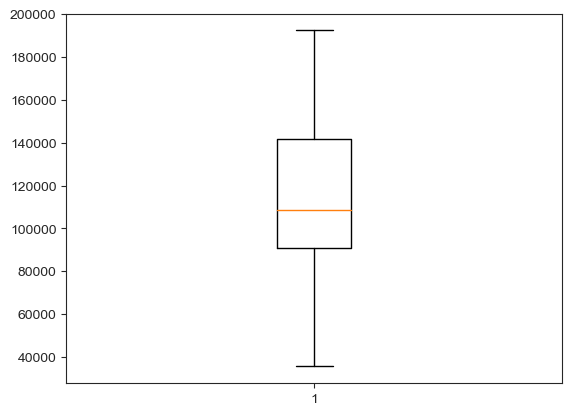

In [45]:
plt.boxplot(df2.Profit);

# We can see in above boxplot the Outlier is Removed

# Now Visualizing the Relation between each independent Feature with respect to the Dependent Feature

<Axes: xlabel='Profit', ylabel='Mrkt'>

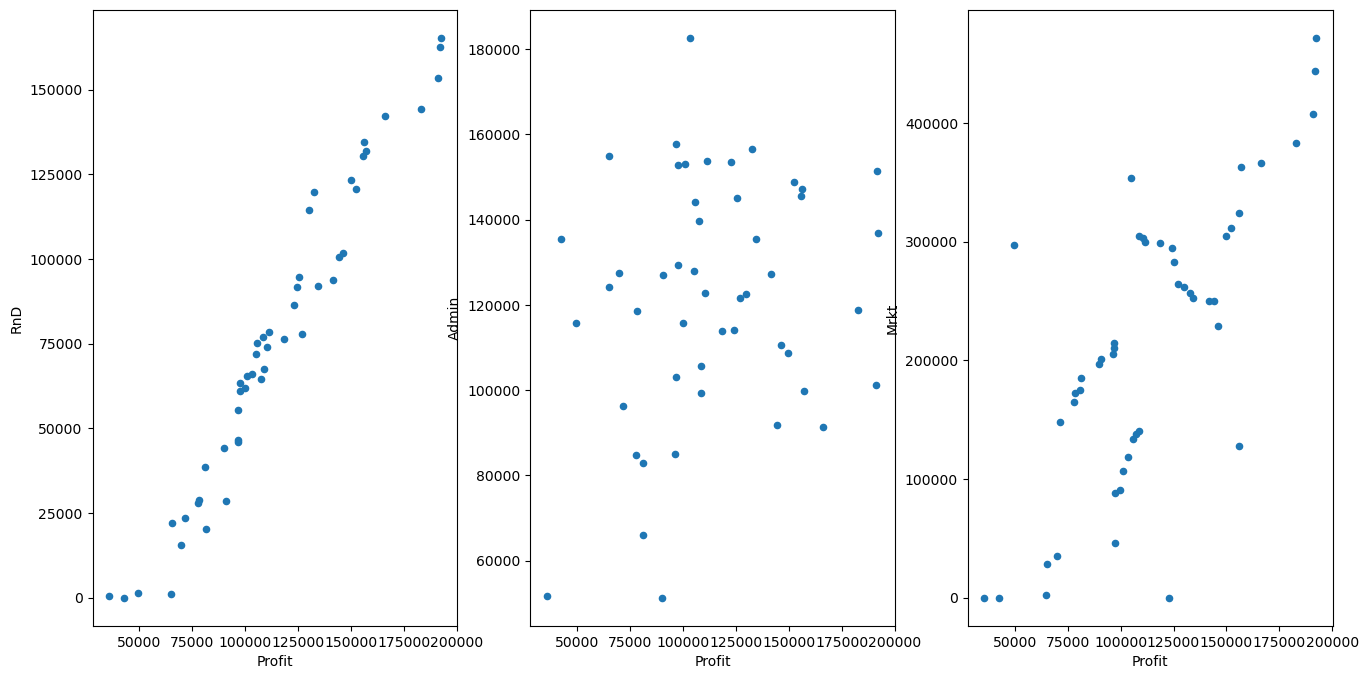

In [24]:
fig,axs= plt.subplots(1,3)
df2.plot(kind='scatter',x='Profit',y='RnD',ax=axs[0],figsize=(16,8))
df2.plot(kind='scatter',x='Profit',y='Admin',ax=axs[1])
df2.plot(kind='scatter',x='Profit',y='Mrkt',ax=axs[2])

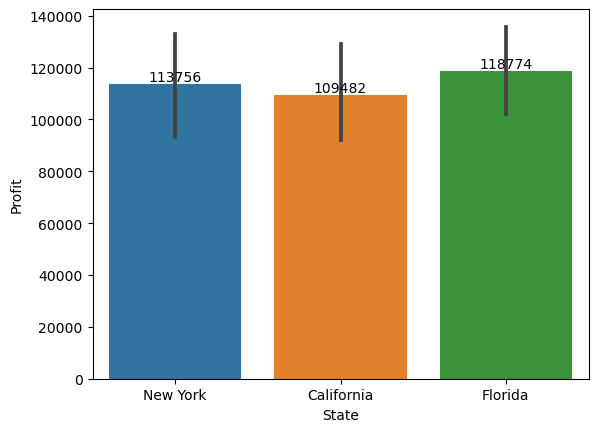

In [33]:
ax = sns.barplot(x = "State", y = 'Profit', data = df2)
for i in ax.containers:
    ax.bar_label(i,)


In [34]:
df2.State.value_counts()

New York      17
California    16
Florida       16
Name: State, dtype: int64

There is'nt much of difference between how much profit each state generates from each other and there is'nt any direct relation

In [79]:
df3=df2.drop('State',axis=1)
df3.head()

,RnD,Admin,Mrkt,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
# checking the corelation between variebles

In [31]:
df2.corr()

,RnD,Admin,Mrkt,Profit
RnD,1.000000,0.243438,0.711654,0.978437
Admin,0.243438,1.000000,-0.037280,0.205841
Mrkt,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


<Axes: >

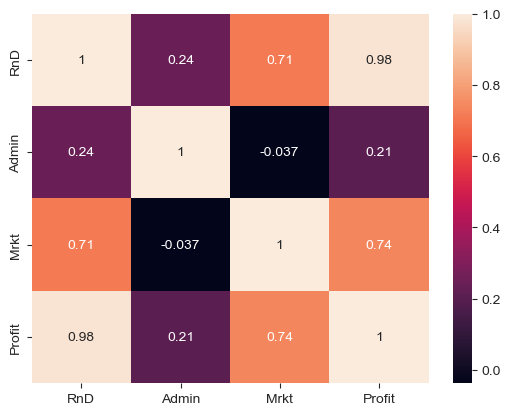

In [46]:
sns.heatmap(df2.corr(), annot=True)

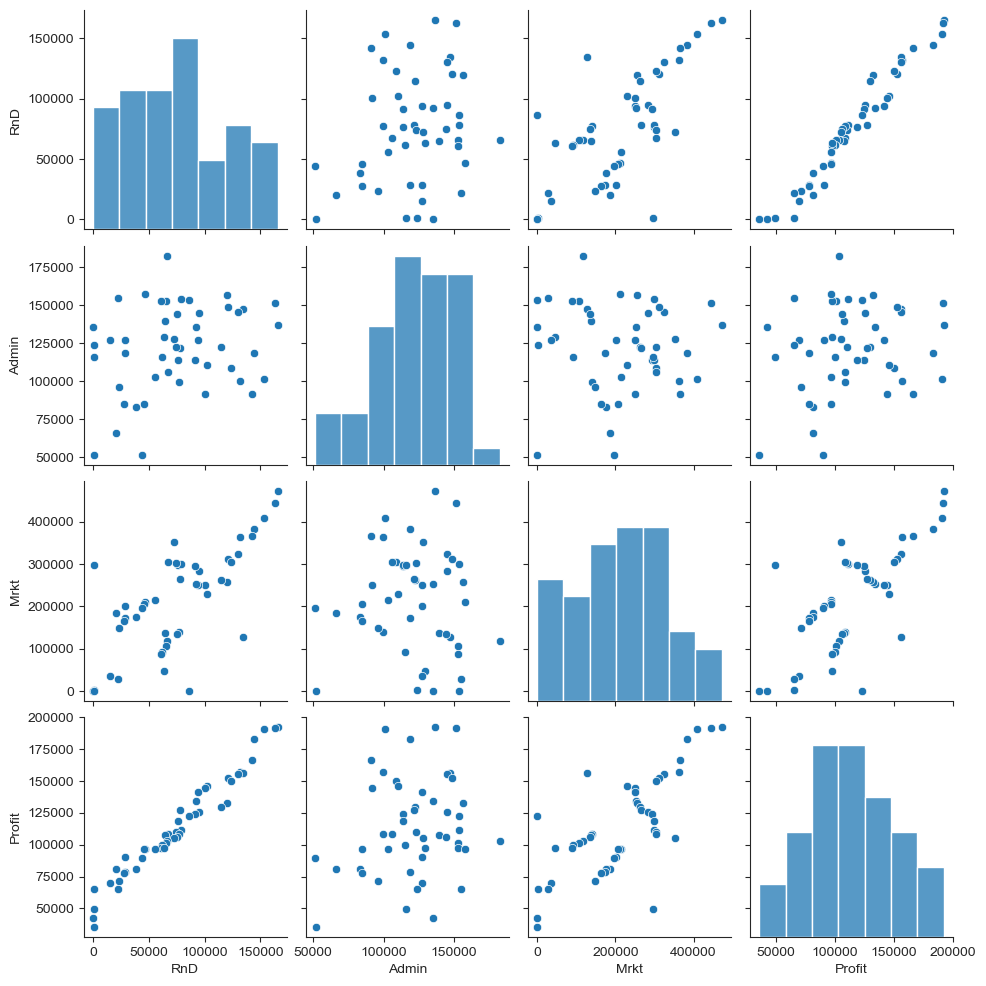

In [47]:
sns.set_style(style='ticks')
sns.pairplot(df2)

# Feature Engineering
Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores

# Applying Standard Scaler

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_std_scaled = pd.DataFrame(scaler.fit_transform(df3),columns=['RnD','Admin','Mrkt','Profit'])
df_std_scaled.head()

,RnD,Admin,Mrkt,Profit
0,2.018325,0.552080,2.146120,2.071556
1,1.956704,1.069017,1.913596,2.059122
2,1.751650,-0.724297,1.613709,2.039490
3,1.548545,-0.098597,1.407457,1.823808
4,1.497818,-1.072513,1.265442,1.381401


In [67]:
# Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 0    0.0
1   -0.0
2   -0.0
3   -0.0
dtype: float64 
Standard Devaition 
 0    1.0
1    1.0
2    1.0
3    1.0
dtype: float64 1


# Preparing model
 Using ordinary least square(OLS) Regression

# Model without Standard scaler

In [104]:
model1 = sm.ols("Profit~RnD+Admin+Mrkt", data =df3).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           8.85e-32
Time:                        23:52:31   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD            0.7830      0.038     20.470      0.000       0.706       0.860
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
Mrkt           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
# model with transformation of standard scaler 
model1 = sm.ols("Profit~RnD+Admin+Mrkt", data = df_std_scaled).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           8.85e-32
Time:                        23:52:33   Log-Likelihood:                 10.154
No. Observations:                  49   AIC:                            -12.31
Df Residuals:                      45   BIC:                            -4.741
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.353e-16      0.029  -4.61e-15      1.000      -0.059       0.059
RnD            0.9254      0.045     20.470      0.000       0.834       1.017
Admin         -0.0165      0.032     -0.518      0.607      -0.080       0.048
Mrkt           0.0801      0.044      1.825      0.075      -0.008       0.168
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# With or Without Trasformation of StandardScaler there is no diffrence in rsquared & adj_rsquared

In [89]:
# now check without removing Outlier
model2 = sm.ols("Profit~RnD+Admin+Mrkt", data = df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           4.53e-30
Time:                        23:20:29   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mrkt           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
# combine admin and marketing feature to predict profit 
# lets check
RnD_plus_Admin= sm.ols("Profit~RnD+Admin", data = df3).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           4.53e-30
Time:                        23:30:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mrkt           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
RnD_plus_Marketing= sm.ols("Profit~RnD+Mrkt", data = df3).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           4.53e-30
Time:                        23:36:26   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mrkt           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
Admin_plus_Marketing= sm.ols("Profit~Mrkt+Admin", data = df_std_scaled).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           4.53e-30
Time:                        23:33:01   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mrkt           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# outlier reamoved model is best

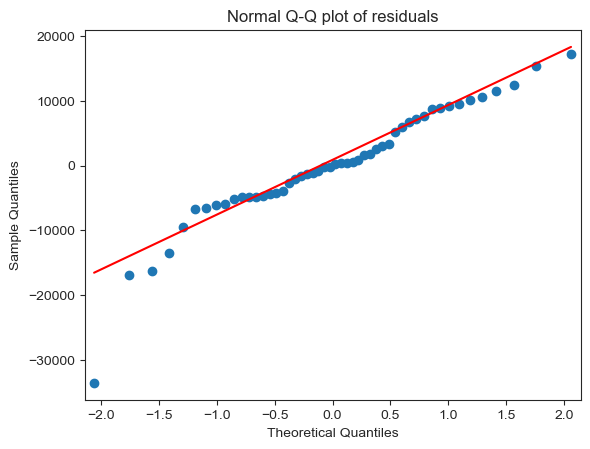

In [101]:
import statsmodels.api as sma
smf.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# predicting profit using combined variables

In [107]:
df2['pred_profit']=model.predict(df2)
df2

,RnD,Admin,Mrkt,State,Profit,pred_profit
0,165349.20,136897.80,471784.10,New York,192261.83,190716.676999
1,162597.70,151377.59,443898.53,California,191792.06,187537.122227
2,153441.51,101145.55,407934.54,Florida,191050.39,180575.526396
3,144372.41,118671.85,383199.62,New York,182901.99,172461.144642
4,142107.34,91391.77,366168.42,Florida,166187.94,170863.486721
5,131876.90,99814.71,362861.36,New York,156991.12,162582.583177
6,134615.46,147198.87,127716.82,California,156122.51,157741.338633
7,130298.13,145530.06,323876.68,Florida,155752.60,159347.735318
8,120542.52,148718.95,311613.29,New York,152211.77,151328.826941
9,123334.88,108679.17,304981.62,California,149759.96,154236.846778


In [110]:
df2['pred_prft_with_outlier']=model2.predict(df1)
df2


,RnD,Admin,Mrkt,State,Profit,pred_profit,pred_prft_with_outlier
0,165349.20,136897.80,471784.10,New York,192261.83,190716.676999,192521.252890
1,162597.70,151377.59,443898.53,California,191792.06,187537.122227,189156.768232
2,153441.51,101145.55,407934.54,Florida,191050.39,180575.526396,182147.279096
3,144372.41,118671.85,383199.62,New York,182901.99,172461.144642,173696.700026
4,142107.34,91391.77,366168.42,Florida,166187.94,170863.486721,172139.514183
5,131876.90,99814.71,362861.36,New York,156991.12,162582.583177,163580.780571
6,134615.46,147198.87,127716.82,California,156122.51,157741.338633,158114.096669
7,130298.13,145530.06,323876.68,Florida,155752.60,159347.735318,160021.363048
8,120542.52,148718.95,311613.29,New York,152211.77,151328.826941,151741.699699
9,123334.88,108679.17,304981.62,California,149759.96,154236.846778,154884.684110


# Table containing R^2 value for prepared models

In [116]:
models={'Different_Models':['model','model2'],
        'R_squared':[model.rsquared,model2.rsquared],
        'R_squared_adjusted':[model.rsquared_adj,model2.rsquared_adj]}
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted
0,model,0.961316,0.958737
1,model2,0.950746,0.947534


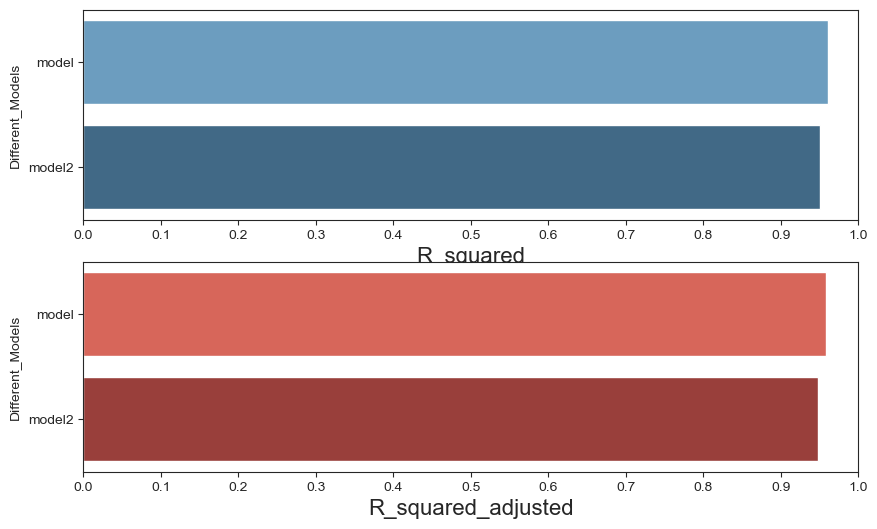

In [120]:
f, axes = plt.subplots(2,1, figsize=(10,6))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

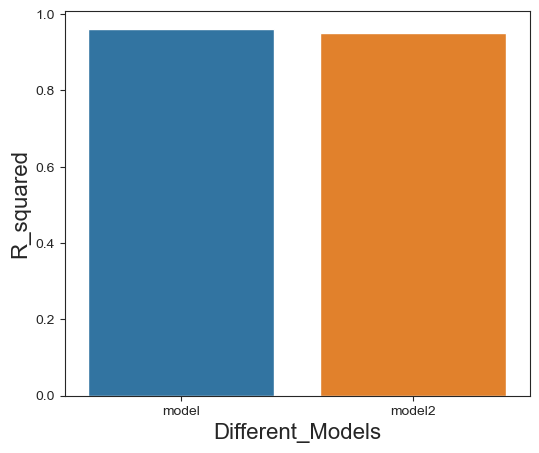

In [129]:
model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(6,5))
sns.barplot(x='Different_Models', y='R_squared', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('R_squared', size=16)

plt.show()